#  TikTok sera la mejor red social para hacer publicidad? 



## Introduccion


Es de gran interes analizar las redes sociales ya que es un lugar donde las empresas cada vez inviertnen mas en publicidad. Se realizara un analisis de datos obtenidos de las principales redes sociales con el objetivo de contestar preguntas que optimizen las posibles campañas publicitarias:
¿Cual es el generador de contenido con mas seguidores?,¿Media de visitas por publicacion?,¿Media seguidores en la red social?. Obteniendo esa informacion se pueden obtener indicadores clave para optimizar los resultados de una campaña publicitaria.

Optimizacion: ¿Cuanto es la media de seguidores para considerar cooperar con un generador de contenido?,¿Cuantas es la media de visitas para considerar cooperar con un generador de contenido? ¿Cuanto es la media de likes para considerar cooperar con un generador de contenido?

## Contexto

La red social Tik Tok actualmente es la mas utilizada en el mundo. Su principal contenido son videos cortos de duracion de 1 segundo hasta 10 minutos. Se espera que con los resultados del analisis de las interacciones de los principales generadores de contenido de la plataforma, surgan datos e indicadores para toamar decisiones al momento de realizar una campaña publicitaria en la plataforma o trabajando con un generador de contenido.

## Datos

* Los datos utilizados para realizar el analisis fueron tomados de la base de datos publica de la plataforma

In [1]:
import pandas as pd

In [2]:
tik_tok_df = pd.read_csv('./entrega/datasets/social_media_influ/social media influencers - tiktok.csv')


In [3]:
tik_tok_df.head()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K


## Metodologia

### Se realiza una limpieza y adaptacion de los datos para trabajar:

* Se formatea los nombres de las levels para formalizar al formato Snake_case

In [7]:
def label_to_snake_case(label):
    return label.lower().replace(' ', '_').replace('.','')

In [8]:
rename_dict ={}

for label in tik_tok_df.columns:
    rename_dict[label] = label_to_snake_case(label)
    


In [9]:
tik_tok_df.rename(columns=rename_dict)

tik_tok_df = tik_tok_df.rename(columns=rename_dict)

In [10]:
tik_tok_df.columns

Index(['tiktoker_name', 'tiktok_name', 'subscribers_count', 'views_avg',
       'likes_avg', 'comments_avg', 'shares_avg'],
      dtype='object')

* En el analisis previo encontramos dos datos `NaN` en la columna TikToker_name. Como
  no influye en el analisis se decide sustituir `NaN` por nombre.

In [11]:
import numpy as np

In [12]:
tik_tok_df.replace(np.nan,'Nombre')

,tiktoker_name,tiktok_name,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K
...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630


* Se convierte a formato numerico los datos proporcionados por
  por la plataforma para posteriormente realizar el analisis

In [13]:
def pasar_a_millones(dataframe,serie,level):
    
    
    """
    pasa la nomesclatura de redes sociales a numero y transfomra
    la serie del data frame.
    
    """
    
    number_dict = {}
    
    for numero in serie:
        
        if 'M' in numero:
             number_dict[numero] =  round(float(numero.replace('M','')),1)*1000000
        
        elif 'K' in numero:
             number_dict[numero] = round(float(numero.replace('K','')),1)*100000 
    
    dataframe[level] = dataframe[level].map(number_dict)  # problemas con los datos que no son enteros


    return print('ok')  # preguntar como aplicar el asstype


In [14]:
pasar_a_millones(tik_tok_df,tik_tok_df['subscribers_count'],'subscribers_count')

ok


In [15]:
pasar_a_millones(tik_tok_df,tik_tok_df['views_avg'],'views_avg')

ok


In [16]:
pasar_a_millones(tik_tok_df,tik_tok_df['likes_avg'],'likes_avg')

ok


In [17]:
pasar_a_millones(tik_tok_df,tik_tok_df['comments_avg'],'comments_avg')

ok


In [18]:
pasar_a_millones(tik_tok_df,tik_tok_df['shares_avg'],'shares_avg')

ok


In [19]:
tik_tok_df.head()

,tiktoker_name,tiktok_name,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
0,ekin.721,MOMO’s,22170000.0,26000000.0,2800000.0,2940000.0,11640000.0
1,dojacat,Doja Cat,22200000.0,25400000.0,5000000.0,3670000.0,4680000.0
2,kiet.ac.quy,Kiệt Ắk Wỷ,2100000.0,20700000.0,3500000.0,3880000.0,3390000.0
3,charlidamelio,charli d’amelio,135400000.0,18700000.0,2600000.0,5470000.0,3520000.0
4,luvadepedreiro,Iran Ferreira (Lai),11400000.0,24800000.0,2600000.0,3270000.0,2680000.0


|     **Columna**    | **Tipo de dato** | **Descripcion del tipo de dato** |
|:-----------------:|:---------------:|:-------------------------------:|
| TikToker name     | `Str`           | Categorico nominal              |
| TikTok name       | `Str`           | Categorico nominal              |
| View avg          | `Str`           | Numerico entero                 |
| Subscribers count | `Str`           | Numerico entero                 |
| Likes avg         | `Str`           | Numerico entero                 |
| comments avg.     | `Str`           | Numerico entero                 |
| Shares avg        | `Str`           | Categorico entero               |




*Importamos los datos ya con las correcciones perteninentes*

In [20]:
tik_tok_df.to_csv('datasets/TikTok_dates.csv',index=False,decimal='.')  # problema con decimales


In [56]:
tik_tok_df.describe()

,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
count,1.000000e+03,1.000000e+03,1.000000e+03,8.830000e+02,7.220000e+02
mean,1.497273e+07,5.377190e+06,3.282318e+07,3.953907e+05,5.203047e+05
std,2.128156e+07,1.380322e+07,1.917063e+07,4.625405e+05,8.853869e+05
min,2.100000e+05,1.000000e+06,1.000000e+06,1.000000e+05,1.000000e+05
25%,2.800000e+06,1.800000e+06,1.990750e+07,1.700000e+05,1.700000e+05
50%,6.600000e+06,2.500000e+06,2.884500e+07,2.600000e+05,2.700000e+05
75%,1.602500e+07,3.600000e+06,4.095250e+07,4.200000e+05,5.575000e+05
max,1.354000e+08,9.824000e+07,9.995000e+07,5.470000e+06,1.518000e+07


In [57]:
tik_tok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tiktoker_name      1000 non-null   object 
 1   tiktok_name        998 non-null    object 
 2   subscribers_count  1000 non-null   float64
 3   views_avg          1000 non-null   float64
 4   likes_avg          1000 non-null   float64
 5   comments_avg       883 non-null    float64
 6   shares_avg         722 non-null    float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


**¿Cual es el generador de contenido con mas seguidores?**

In [42]:
max_seguirores = tik_tok_df.subscribers_count.max()

In [43]:
tik_tok_df[tik_tok_df.subscribers_count==max_seguirores]

,tiktoker_name,tiktok_name,subscribers_count,views_avg,likes_avg,comments_avg,shares_avg
3,charlidamelio,charli d’amelio,135400000.0,18700000.0,2600000.0,5470000.0,3520000.0


El mayor generador de contenido con mas seguidores es Charli d´amelio con 135400000 de seguidores

**¿Cual es la Media de visitas por publicacion de los generadores de cotenido con mas seguidores?**

In [49]:
mask_visitas = tik_tok_df.views_avg.mean()

media_visitas = int(mask_visitas)

La media de visitas por publicacion es de 5377190

**¿Media seguidores en la red social?**

In [53]:
mask_seguidores = tik_tok_df.subscribers_count.mean()

media_seguidores = int(mask_seguidores)



La media de cantidad de seguidores de los generadores de contenido mas populares de TikTok es de 14972730

**Grafico de dispersion de la cantidad de likes por publicaion en funcion de los comentarios.**

<AxesSubplot:xlabel='likes_avg', ylabel='comments_avg'>

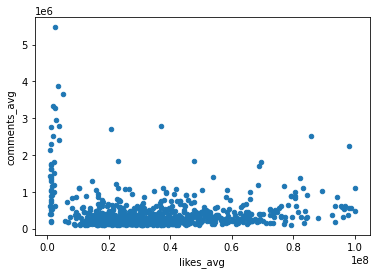

In [73]:
tik_tok_df.plot.scatter(x='likes_avg', y='comments_avg')

**Numero de comentarios por publicacion de cada los TikTokers con mayor cantidad de seguidores.**


<AxesSubplot:xlabel='tiktok_name'>

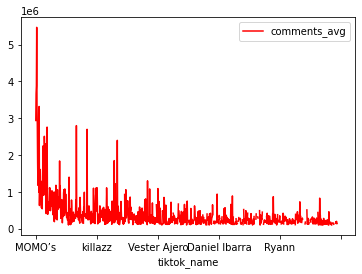

In [72]:
tik_tok_df.plot.line(x='tiktok_name', y='comments_avg',c='red')

## Conclusiones

Observando el analisis de los datos observamos : que al momento de decidir realizar
una campaña de publicidad en la plataforma hay que tener en cuenta principalemte
la cantidad de vistas por publicacion que tiene el generador de contenido. Ya que no
son proporcionales a la catnidad de seguidores.

Obsevando la media de vistas por publicacion en TikTok, un factor 
predominante va a ser el tipo de contenido al cual se enfoque los productos o servicios
los cuales queremos promocionar.

TikTok es una plataforma diversa donde sus TikTokers mas populares general un contenido
de un tema en general lo que facilita al momento de seleccionar el publico objetivo.


## Anecdotas

Obtener un archivo csv el cual especifique el tipo de contenido de cada TikToker.